In [6]:
library(FactoMineR)
library(factoextra)
library(tidyverse)
library(dplyr)
library(cowplot)
library(tidyr)
library("ggExtra")
library(ggbeeswarm)
library(gghalves)
library(reshape2)


In [ ]:
### Plot MCA Results ###
########################

In [ ]:
### without Population structure Control ###

In [7]:
NCV_AUC_np <-  read.csv("NoPopControl/RESULTS.csv")[,c(1,4,5)]
colnames(NCV_AUC_np) <- c("Iterations","Train","Test")
NCV_AUC_np$Iterations <- as.factor(as.character(NCV_AUC_np$Iterations))
NCV_AUC_np <- melt(NCV_AUC_np)
colnames(NCV_AUC_np) <- c("Iteration","Split","AUC")

NCV_AUC_np %>% group_by(Split) %>% 
summarise(Mean=mean(AUC))


Using Iterations as id variables



Split,Mean
<fct>,<dbl>
Train,0.9872787
Test,0.8832813


In [ ]:
## plots

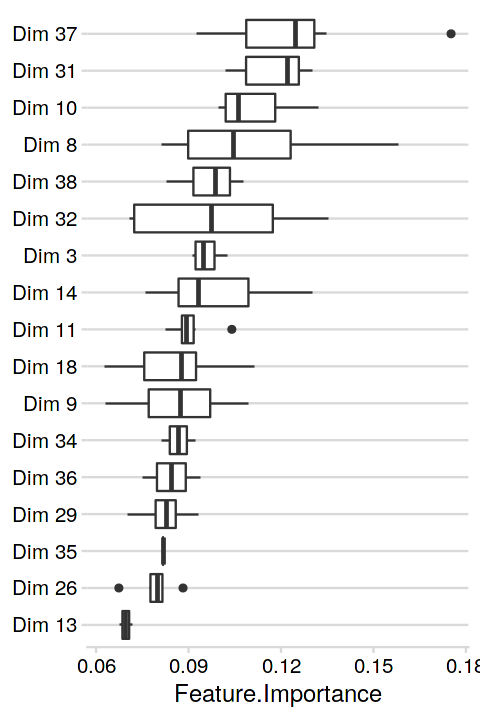

Using X as id variables

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


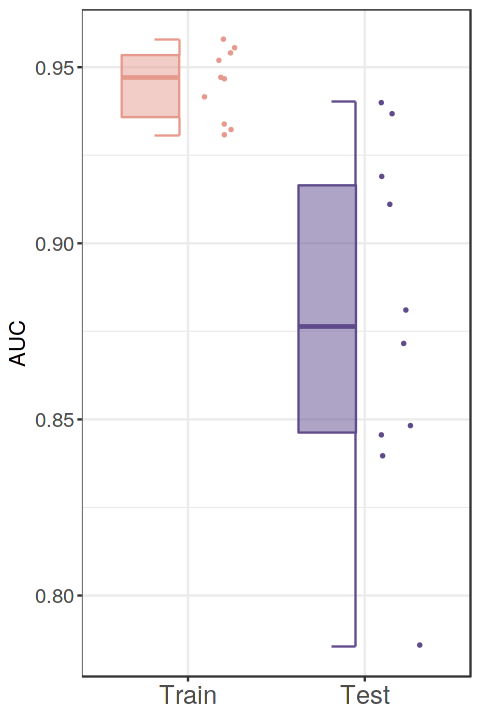

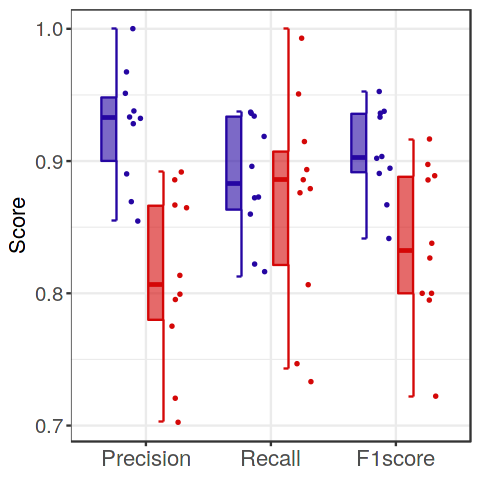

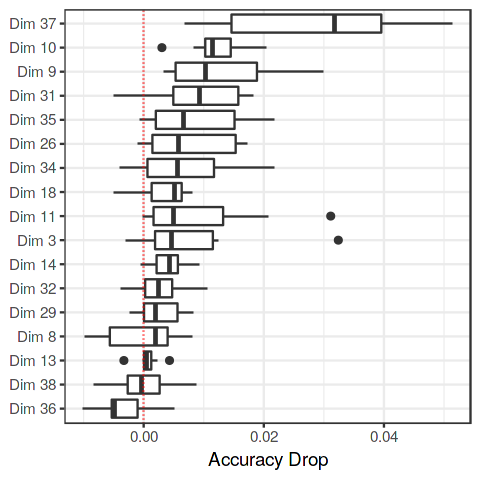

In [24]:
options(repr.plot.width=4, repr.plot.height=4)

NCVauc_npop <- ggplot(NCV_AUC_np)+
aes(x=Split,y=AUC, fill=Split,color=Split)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.5) +
geom_half_point(size=0.5) +
scale_fill_manual(values=c("#E69A8DFF","#5F4B8BFF"))+
scale_color_manual(values=c("#E69A8DFF","#5F4B8BFF"))+
theme_minimal_hgrid()+ylab('AUC')+
ggtitle("NCV Outer Folds AUC")+
theme(axis.title.x = element_blank(),
      axis.title.y = element_text(size = 13),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=12),
      plot.title = element_text(size = 12, face = "bold",hjust = 0.5),
     legend.position="none")
npouterAUC <- NCVauc_npop
# npouterAUC
library(forcats)

FI_NCV <- read.csv("NoPopControl/FeatureImportanceNCV.csv")
FI_NCV$Feature.Label <- as.factor(FI_NCV$Feature.Label)
# FI_NCV
options(repr.plot.width=4, repr.plot.height=6)

fi_ncv <- ggplot(FI_NCV)+
aes(y=fct_reorder(Feature.Label, Feature.Importance, median,.desc =FALSE),x=Feature.Importance)+
geom_boxplot()+
theme_minimal_hgrid()+
theme(axis.title.y = element_blank())
npfi_ncv <- fi_ncv
npfi_ncv
## Cross Val with selected features
clrep <- read.csv("NoPopControl/ClasRepCV.csv")
auc_cv <- rbind(cbind(read.csv("NoPopControl/auroctrCV.csv"),Split="Train"),
                cbind(read.csv("NoPopControl/aurocteCV.csv"),Split="Test"))
auc_cv$Split <- factor(auc_cv$Split)
auc_cv$X <- factor(auc_cv$X)

### AUC
cv_auc <- ggplot(auc_cv)+
aes(x=fct_reorder(Split,X0, .desc=TRUE),y=X0,fill=Split,color=Split)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA,alpha=0.5) +
geom_half_point(size=0.5) +ylab('AUC')+
scale_fill_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
scale_color_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
theme_bw()+
theme(axis.title.x = element_blank(),
      axis.title.y = element_text(size=13),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=12),
      plot.title = element_text(size = 12, face = "bold",hjust = 0.5),
     legend.position="none")
npcv_auc <- cv_auc
npcv_auc

# Classification Report


clrep <- filter(clrep, (X==1) | (X==0))  %>% 
select(!support) %>% 
mutate(X=factor(X)) %>% 
rename(Precision='precision', Recall='recall', F1score='f1.score')
clrepm <- melt(clrep)


options(repr.plot.width=4, repr.plot.height=4)
clrep_cv <- clrepm  %>% 
ggplot()+
aes(x=variable, y=value, fill=X, color=X)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
theme_bw()+ylab('Score')+
scale_color_manual(values=c("#2506A2","#D40707"))+
scale_fill_manual(values=c("#2506A2","#D40707"),name="AET", labels=c("Eradicated","Failed"))+
guides(colour=FALSE)+
theme(axis.title.y = element_text(size=13),
    axis.title.x = element_blank(),
    axis.text.x = element_text(size=13),
      axis.text.y = element_text(size=12),
     legend.position="none",
     legend.key.size = unit(0.5, 'cm'),
     legend.title = element_text(size=0),
     legend.text = element_text(size=11))
npclrep_cv <- clrep_cv
npclrep_cv
### Permutation Importance
PI_CV <- read.csv("NoPopControl/PermResults_CV.csv")
pi_cv <- ggplot(PI_CV)+
aes(x=Mean,y=fct_reorder(Feature,Mean,median))+
geom_boxplot()+
xlab("Accuracy Drop")+
theme_bw()+
theme(axis.title.y = element_blank())+
geom_vline(xintercept =0, linetype='dotted', col = 'red')
nppi_cv <- pi_cv
nppi_cv

In [ ]:
### with Population structure Control ###

In [9]:
NCV_AUC <-  read.csv("PopControl/RESULTS.csv")[,c(1,4,5)]
colnames(NCV_AUC) <- c("Iterations","Train","Test")
NCV_AUC$Iterations <- as.factor(as.character(NCV_AUC$Iterations))
NCV_AUC <- melt(NCV_AUC)
colnames(NCV_AUC) <- c("Iteration","Split","AUC")

Using Iterations as id variables



In [25]:
options(repr.plot.width=4, repr.plot.height=4)

## Outer AUC ##

NCVauc_pop <- ggplot(NCV_AUC)+
aes(x=Split,y=AUC, fill=Split,color=Split)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
scale_fill_manual(values=c("#E69A8DFF","#5F4B8BFF"))+
scale_color_manual(values=c("#E69A8DFF","#5F4B8BFF"))+
theme_bw()+
theme(axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=12),
      plot.title = element_text(size = 12, face = "bold",hjust = 0.5),
     legend.position="none")
pouterAUC <- NCVauc_pop

## Feature Importance ##
library(forcats)
FI_NCV <- read.csv("PopControl/FeatureImportanceNCV.csv")
FI_NCV$Feature.Label <- as.factor(FI_NCV$Feature.Label)
# FI_NCV

options(repr.plot.width=4, repr.plot.height=6)

fi_ncv <- ggplot(FI_NCV)+
aes(y=fct_reorder(Feature.Label, Feature.Importance, median,.desc =FALSE),x=Feature.Importance)+
geom_boxplot()+
theme_minimal_hgrid()+
theme(axis.title.y = element_blank())
fi_ncv_ps <- fi_ncv


## Cross Val with selected features

clrep <- read.csv("PopControl/ClasRepCV.csv")
auc_cv <- rbind(cbind(read.csv("PopControl/auroctrCV.csv"),Split="Train"),
                cbind(read.csv("PopControl/aurocteCV.csv"),Split="Test"))
auc_cv$Split <- factor(auc_cv$Split)
auc_cv$X <- factor(auc_cv$X)
cv_auc <- ggplot(auc_cv)+
aes(x=fct_reorder(Split,X0, .desc=TRUE),y=X0,fill=Split,color=Split)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
scale_fill_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
scale_color_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
theme_bw()+
theme(axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=12),
      plot.title = element_text(size = 12, face = "bold",hjust = 0.5),
     legend.position="none")
# clrep
clrep <- filter(clrep, (X==1) | (X==0))  %>% 
select(!support) %>% 
mutate(X=factor(X)) %>% 
rename(Precision='precision', Recall='recall', F1score='f1.score')
clrepm <- melt(clrep)
options(repr.plot.width=4, repr.plot.height=4)

clrep_cv <- clrepm  %>% 
ggplot()+
aes(x=variable, y=value, fill=X, color=X)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
theme_bw()+
scale_color_manual(values=c("#2506A2","#D40707"))+
scale_fill_manual(values=c("#2506A2","#D40707"),name="AET", labels=c("Eradicated","Failed"))+
guides(colour=FALSE)+
theme(axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.x = element_text(size=13),
      axis.text.y = element_text(size=12),
     legend.position=c(0.7,0.92),
     legend.key.size = unit(0.5, 'cm'),
     legend.title = element_text(size=0),
     legend.text = element_text(size=11))
PI_CV <- read.csv("PopControl/PermResults_CV.csv")
pi_cv <- ggplot(PI_CV)+
aes(x=Mean,y=fct_reorder(Feature,Mean,median))+
geom_boxplot()+
xlab("Accuracy Drop")+
theme_bw()+
theme(axis.title.y = element_blank())

Using X as id variables

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


In [ ]:
### Figure 6

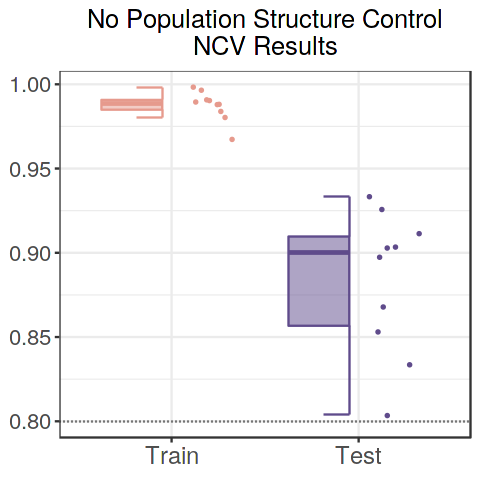

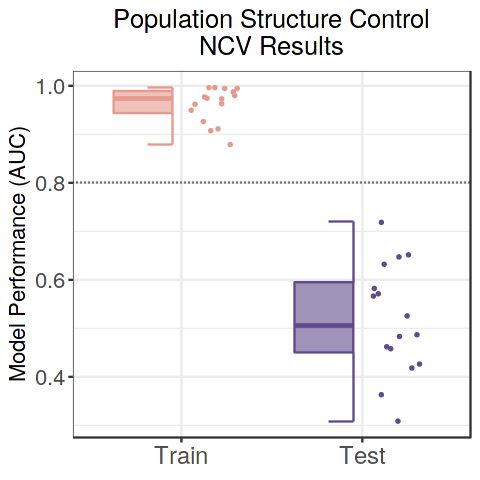

In [26]:

np <- npouterAUC+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
theme(axis.text.y = element_text(size=13),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      legend.position = "none")+ggtitle("No Population Structure Control\nNCV Results")+
theme(plot.title = element_text(hjust = 0.5,size=15))+
theme(strip.text.x = element_text(size = 10))
np
p <- pouterAUC+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
ylab('Model Performance (AUC)')+
theme(axis.text.y = element_text(size=13),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size=13),
      legend.position = "none")+ggtitle("Population Structure Control\nNCV Results")+
theme(plot.title = element_text(hjust = 0.5,size=15))+
theme(strip.text.x = element_text(size = 10))
p

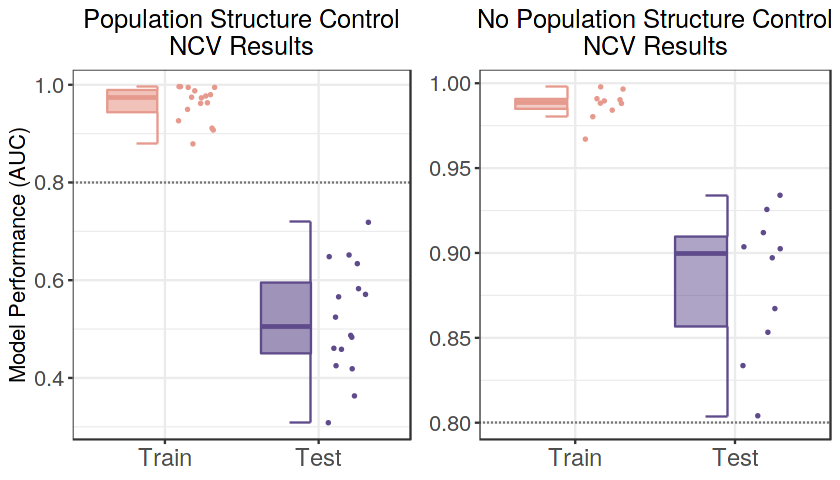

In [27]:
options(repr.plot.width=7, repr.plot.height=4)
title_theme <- ggdraw() +
  draw_label("NCV outer folds AUC",fontface = "bold")
outer_auc <- plot_grid(p,np)
outer_auc_t <- plot_grid(title_theme,outer_auc,ncol = 1, rel_heights = c(0.1, 1))
outer_auc 

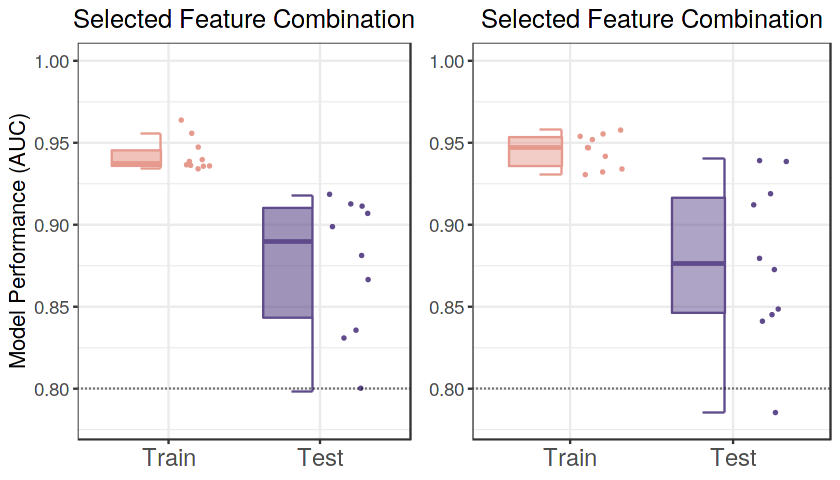

In [28]:
npauc <-  npcv_auc+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
theme(axis.text.y = element_text(size=11),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      legend.position = "none")+
scale_y_continuous(limits = c(0.78,1))+ggtitle("Selected Feature Combination")+
theme(plot.title = element_text(hjust = 0.5,size=15))+
theme(strip.text.x = element_text(size = 6))

auc <- cv_auc+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
ylab('Model Performance (AUC)')+
theme(axis.text.y = element_text(size=11),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size=13),
      legend.position = "none")+
scale_y_continuous(limits = c(0.78,1))+
ggtitle("Selected Feature Combination")+
theme(plot.title = element_text(hjust = 0.5,size=15))+
theme(strip.text.x = element_text(size = 6))
# title_theme <- ggdraw() +
#   draw_label("CV with Selected Features",fontface = "bold")
CV_auc <- plot_grid(auc,npauc)
CV_auc

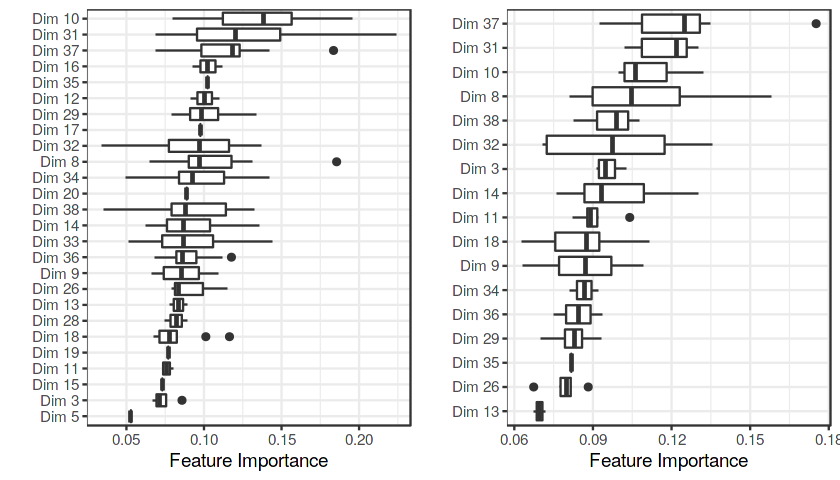

In [29]:
fi <- plot_grid(fi_ncv_ps+theme(axis.text.y = element_text(size=10))+xlab("Feature Importance")+ylab('')+theme_bw(),
          npfi_ncv+xlab("Feature Importance")+ylab('')+theme_bw())
fi


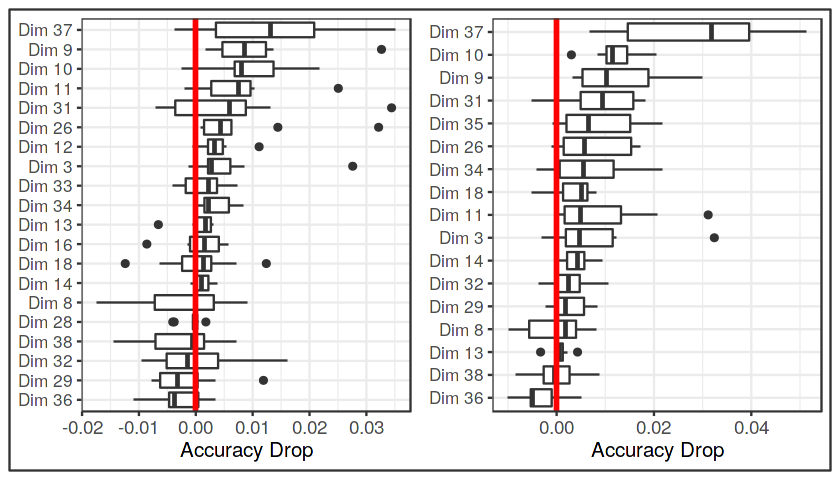

In [30]:
CV_pi <- plot_grid(pi_cv+geom_vline(xintercept=0,col="red",size=1.2)+
                   theme(axis.text.y = element_text(size=10),
                        axis.text.x = element_text(size=11),
                         axis.title.x = element_text(size=12),
                          plot.subtitle = element_text(hjust = 0)),
nppi_cv+geom_vline(xintercept=0,col="red",size=1.2)+
                  theme(axis.text.y = element_text(size=10),
                        axis.text.x = element_text(size=11),
                       axis.title.x = element_text(size=12)))
CV_pi+theme_bw()

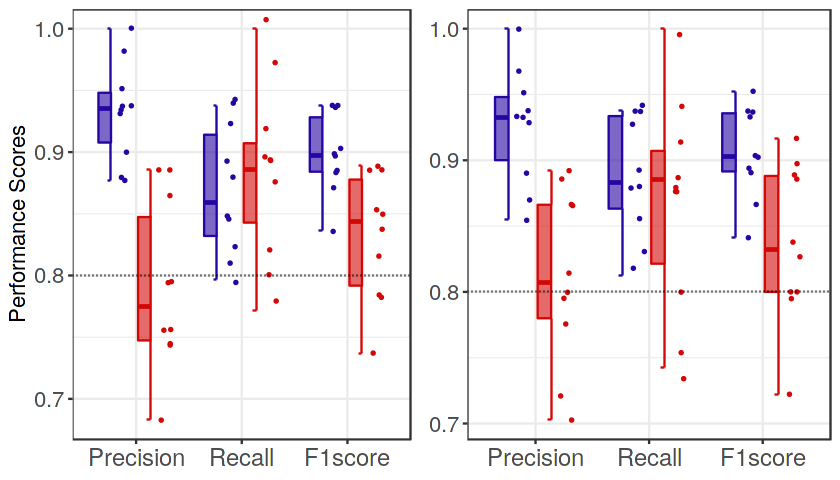

In [31]:
npcl <- npclrep_cv+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
theme(axis.text.y = element_text(size=13),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      legend.position = "none")

cl <- clrep_cv+theme_bw()+geom_hline(yintercept=0.8,  linetype='dotted')+
ylab('Performance Scores')+
theme(axis.text.y = element_text(size=13),
      axis.text.x = element_text(size=14),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size=13),
      legend.position = "none")
CV_cl <- plot_grid(cl,npcl)
CV_cl

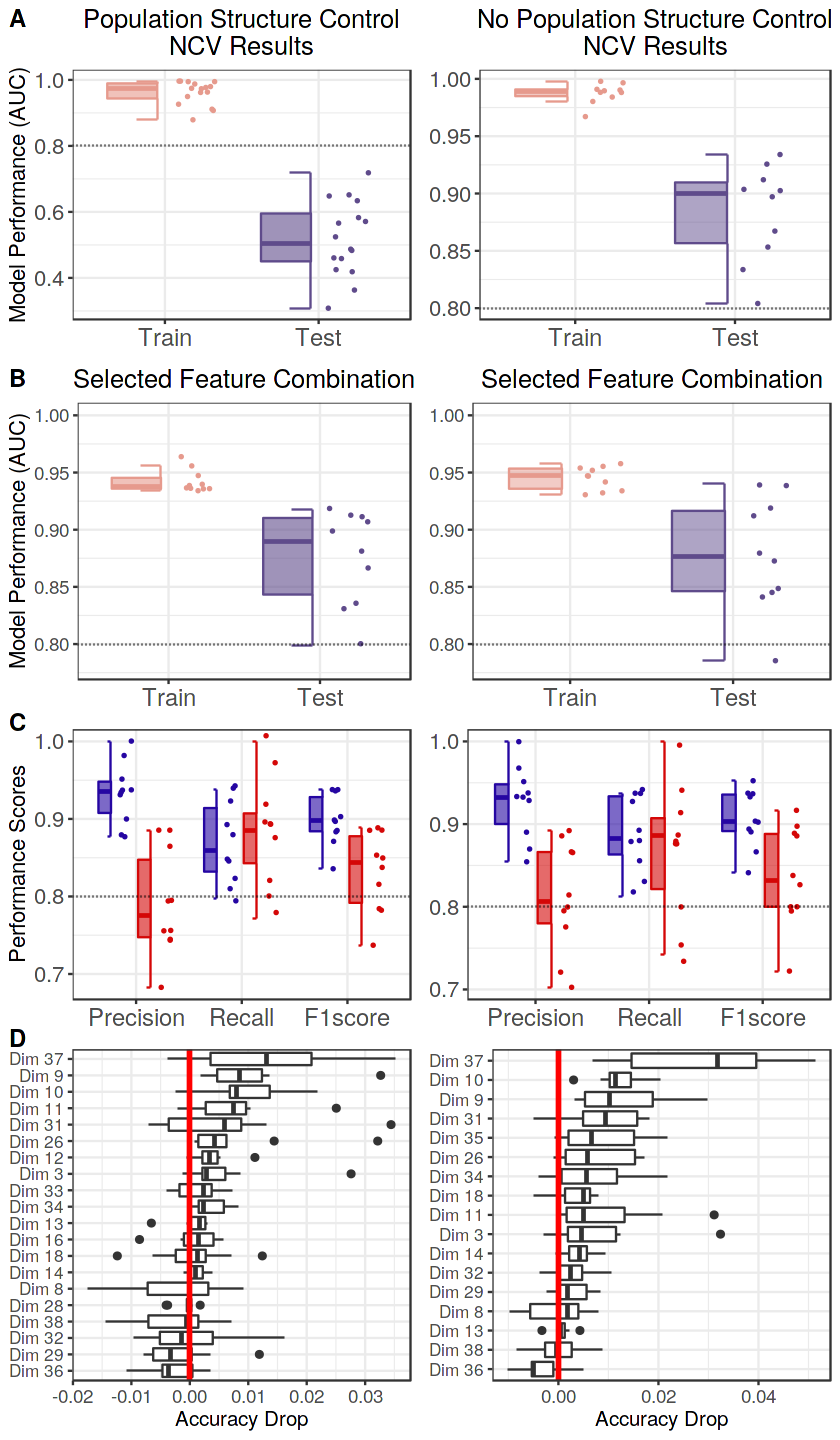

In [32]:
options(repr.plot.width=7, repr.plot.height=12)

p_ab <- plot_grid(outer_auc,
                  CV_auc+ylab('Model Performance (AUC)')+theme(axis.title.x = element_text(size=10)),
                  ncol=1,
                    labels = c('A','B'),label_x = 0,label_y = 1,rel_heights = c(0.8,0.8))
# p_ab

p_cd <- plot_grid(CV_cl,CV_pi,ncol=1,
                    labels = c('C','D'),label_x = 0,label_y = 1.05,rel_heights = c(0.8,1))
# p_cd

p_abcd <- plot_grid(p_ab,p_cd,ncol=1)
p_abcd
ggsave('Figure6.png', device = 'png',dpi = 450,width = 7,height = 12)
ggsave('Figure6.tiff', device = 'tiff',dpi = 450,width = 7,height = 12)

X,Precision,recall,f1.score
<fct>,<dbl>,<dbl>,<dbl>
0,0.9310345,0.8437500,0.8852459
1,0.7560976,0.8857143,0.8157895
0,0.8769231,0.8906250,0.8837209
1,0.7941176,0.7714286,0.7826087
0,0.9375000,0.9375000,0.9375000
1,0.8857143,0.8857143,0.8857143
0,1.0000000,0.8125000,0.8965517
1,0.7446809,1.0000000,0.8536585
0,0.9000000,0.8437500,0.8709677
